In [1]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial

from misc import *

# dut.drv.serUSB = 'COM19'


In [8]:
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

In [12]:
dut.disconnect()

In [13]:
dpe = DPE('COM3')

Running <function DPE.init_dut at 0x000001D79C848C18> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.04s
Serial disconnected


Running <function DPE.read at 0x000001D79C848F78> with serial
[INFO] Elapsed time = 0.28s
Serial disconnected


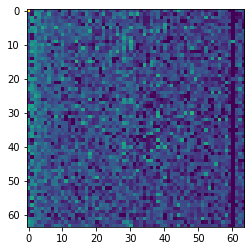

In [21]:
g=dpe.read(2)
plt.imshow(g)

In [10]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


5.00-

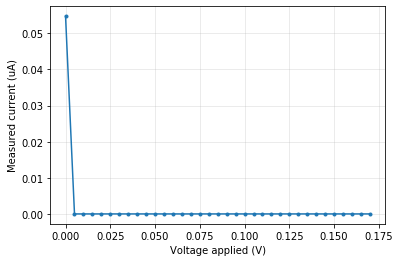

In [11]:
ar=0
r=0
c=2

Vreads = np.arange(0, 0.175, 0.005)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Voltage applied (V)')
plt.ylabel('Measured current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

Working on array 0 , device (row= 50 col= 50 )
Array 0 , device (row= 50 col= 50 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


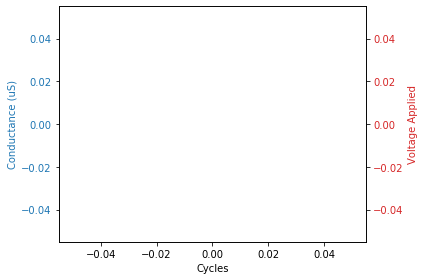

Working on array 0 , device (row= 51 col= 50 )
Array 0 , device (row= 51 col= 50 ) Init G= 0.0  Target G= 4.981069196219323e-06  Final G= 8.108504398826977e-06


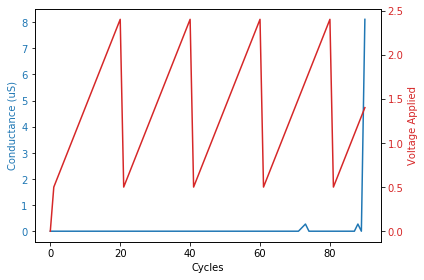

Working on array 0 , device (row= 52 col= 50 )
Array 0 , device (row= 52 col= 50 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


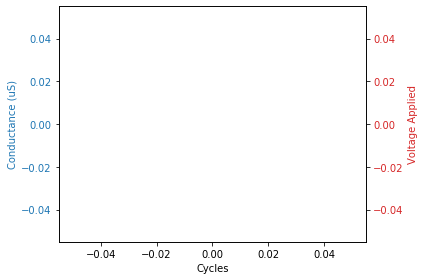

Working on array 0 , device (row= 53 col= 50 )
Array 0 , device (row= 53 col= 50 ) Init G= 0.0  Target G= 7.723643648205325e-05  Final G= 7.5183284457478e-05


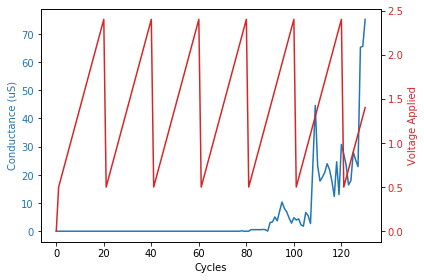

Working on array 0 , device (row= 50 col= 51 )
Array 0 , device (row= 50 col= 51 ) Init G= 0.0  Target G= 1.0763773389044218e-05  Final G= 9.938905180840665e-06


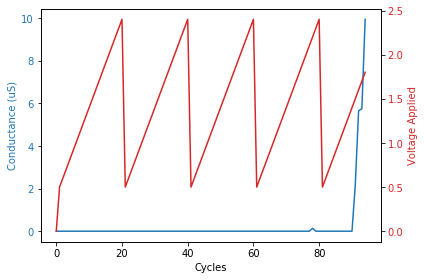

Working on array 0 , device (row= 51 col= 51 )
Array 0 , device (row= 51 col= 51 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


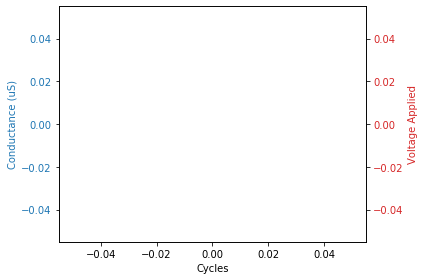

Working on array 0 , device (row= 52 col= 51 )
Array 0 , device (row= 52 col= 51 ) Init G= 0.0  Target G= 5.300196062307805e-05  Final G= 6.834066471163244e-05


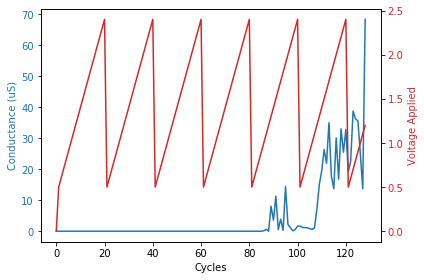

Working on array 0 , device (row= 53 col= 51 )
Array 0 , device (row= 53 col= 51 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


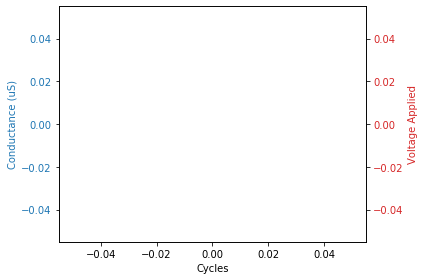

Working on array 0 , device (row= 50 col= 52 )
Array 0 , device (row= 50 col= 52 ) Init G= 0.0  Target G= 9.229184070136398e-05  Final G= 9.123492994460735e-05


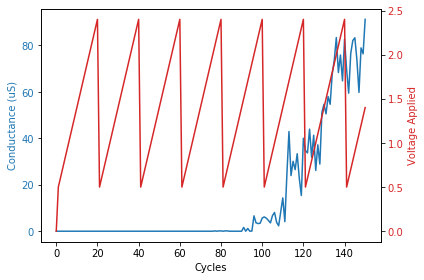

Working on array 0 , device (row= 51 col= 52 )
Array 0 , device (row= 51 col= 52 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


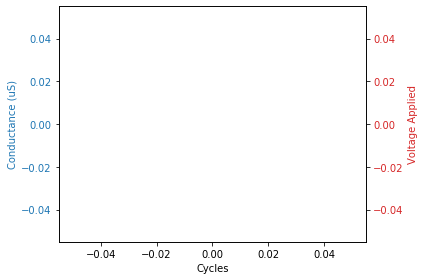

Working on array 0 , device (row= 52 col= 52 )
Array 0 , device (row= 52 col= 52 ) Init G= 0.0  Target G= 1.069934296538122e-05  Final G= 1.5395894428152488e-05


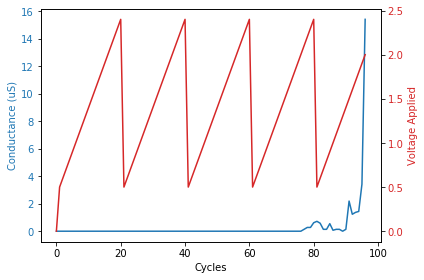

Working on array 0 , device (row= 53 col= 52 )
Array 0 , device (row= 53 col= 52 ) Init G= 0.0  Target G= 6.598157051485032e-05  Final G= 6.414956011730205e-05


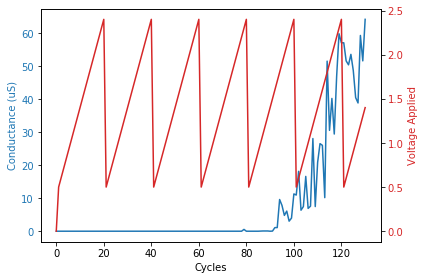

Working on array 0 , device (row= 50 col= 53 )
Array 0 , device (row= 50 col= 53 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


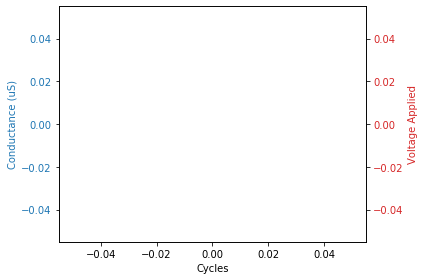

Working on array 0 , device (row= 51 col= 53 )
Array 0 , device (row= 51 col= 53 ) Init G= 0.0  Target G= 9.943340410245582e-05  Final G= 9.579667644183771e-05


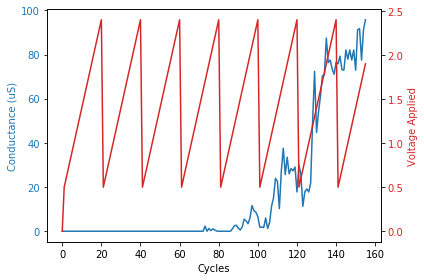

Working on array 0 , device (row= 52 col= 53 )
Array 0 , device (row= 52 col= 53 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


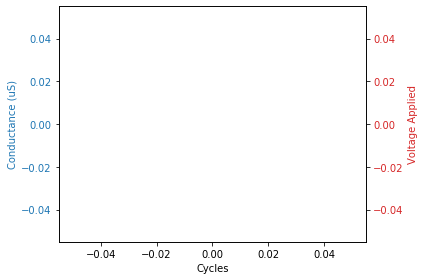

Working on array 0 , device (row= 53 col= 53 )
Array 0 , device (row= 53 col= 53 ) Init G= 0.0  Target G= 1.9999999949504854e-06  Final G= 0.0


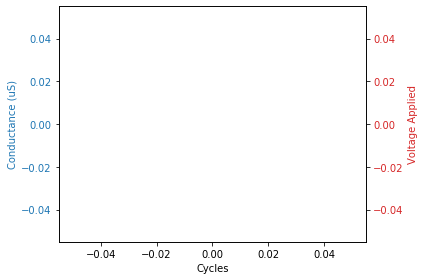

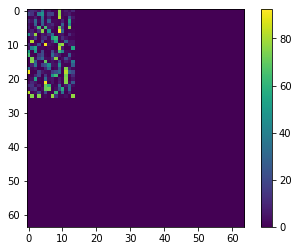

In [13]:
from lib_data import *
import scipy.io as sio
#load_workspace(vars(), '20190814-205207-CNN weights')
mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']

VreadGate = 5.0
vRead = 0.2
arr = 0
startRow = 50
startCol = 50
numRows = 4
numCols = 4
GMin = 2e-6
GMax = 100e-6
# Take previous code by putting finalGfc in scaledGfc
scaledGfc = finalGfc
# First reshape Gfc to fit within the 64 rows
# reshape from 113x20 to 57x40
newGfc = np.zeros((57,40))+GMin
newGfc[0:57,0:20]=scaledGfc[0:57,0:20]
newGfc[0:56,20:40]=scaledGfc[57:113,0:20]

targetGVals = newGfc
targetGThresh = 4e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedSet = np.arange(0.5, 2.5, 0.1)
vAppliedReset = np.arange(0.5, 3.2, 0.1)
vGateSet = np.arange(0.5, 1.7, 0.1)
vGateReset = np.arange(5.0, 5.5, 0.5)

GHistory = []
VHistory = []

vOffset = 0
Vgate = 5
Vref = 0.5

for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        thisGtarget = targetGVals[i,j]
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
        
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        #print('Initial G=', currG, 'Target G =', thisGtarget)
        initG = currG
        # Now, if device is lower than target, SET it
        if currG < (thisGtarget-targetGThresh):
            for vgate in vGateSet:
                for vappset in vAppliedSet:
                    # Apply vappset pulse, then read
                    a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                    rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(vappset)
                    if currG >= (thisGtarget-targetGThresh):
                        break
                if currG >= (thisGtarget-targetGThresh):
                    break
            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)

        # Else, if device is higher than target, RESET it, then SET it
        elif currG > (thisGtarget+targetGThresh):
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                    rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)

                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= (thisGtarget+targetGThresh):
                        break
                if currG <= (thisGtarget+targetGThresh):
                    break

            #Now if it is below Gtarget, then do SET operations; If it is above Gtarget, then Reset failed and device stuck ON
            
            #if currG <= thisGtarget and thisGtarget >= 2.5e-6:
            if currG <= (thisGtarget-targetGThresh):
                for vgate in vGateSet:
                    for vappset in vAppliedSet:
                        # Apply vappset pulse, then read
                        a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                    
                        currG = rdCurr/vRead
                        thisGHistory.append(currG)
                        thisVHistory.append(vappset)
                        if currG >= (thisGtarget-targetGThresh):
                            break
                    if currG >= (thisGtarget-targetGThresh):
                        break

        GHistory.append(thisGHistory)
        VHistory.append(thisVHistory)
        print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG)

        fig, ax1 = plt.subplots()
        color = 'tab:blue'
        ax1.set_xlabel('Cycles')
        ax1.set_ylabel('Conductance (uS)', color=color)
        ax1.plot([i* 1e6 for i in thisGHistory], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax2 = ax1.twinx()  
        color = 'tab:red'
        ax2.set_ylabel('Voltage Applied', color=color)
        ax2.plot(thisVHistory, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        fig.tight_layout()  
        plt.show()
        
time.sleep(15)

arr = 2
numRows = 64
numCols = 64
vRead = 0.2
Vgate = 5.0
Gmap22 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                    
            Gmap22[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap22)
plt.colorbar()

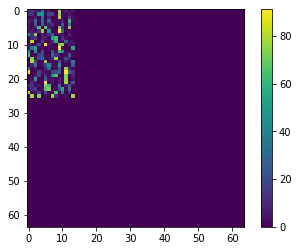

In [12]:
arr = 2
numRows = 64
numCols = 64
vRead = 0.2
Vgate = 5.0
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                    
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

In [14]:
dut.disconnect()